In [115]:
# Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.
# prep: import modules and get pwd
# Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [145]:
# get the data
#Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

query = '''SELECT f.title, count(distinct case when month(rental_date) = 8 then 1 else null end) as rented_in_august, count(distinct case when month(rental_date) = 7 then 1 else null end) as rented_in_july,count(distinct case when month(rental_date) = 6 then 1 else null end) as rented_in_june 
FROM film f
left join inventory i
on f.film_id = i.film_id
left join rental r 
on i.inventory_id = r.inventory_id
group by f.title;'''

data = pd.read_sql_query(query, engine)
data.head()






,title,rented_in_august,rented_in_july,rented_in_june
0,ACADEMY DINOSAUR,1,1,1
1,ACE GOLDFINGER,1,1,0
2,ADAPTATION HOLES,1,1,1
3,AFFAIR PREJUDICE,1,1,1
4,AFRICAN EGG,1,1,1


In [146]:
data.head

<bound method NDFrame.head of                  title  rented_in_august  rented_in_july  rented_in_june
0     ACADEMY DINOSAUR                 1               1               1
1       ACE GOLDFINGER                 1               1               0
2     ADAPTATION HOLES                 1               1               1
3     AFFAIR PREJUDICE                 1               1               1
4          AFRICAN EGG                 1               1               1
..                 ...               ...             ...             ...
995     YOUNG LANGUAGE                 1               1               1
996         YOUTH KICK                 1               1               1
997       ZHIVAGO CORE                 1               1               1
998  ZOOLANDER FICTION                 1               1               1
999          ZORRO ARK                 1               1               1

[1000 rows x 4 columns]>

In [148]:
data.shape

(1000, 4)

In [149]:
data.dtypes

title               object
rented_in_august     int64
rented_in_july       int64
rented_in_june       int64
dtype: object

In [150]:
import matplotlib.pyplot as plt

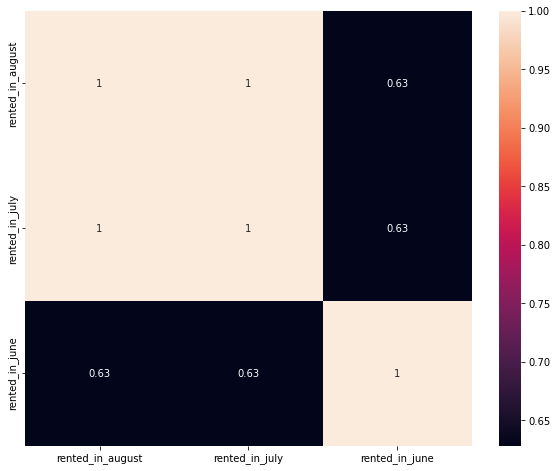

In [151]:
corr_matrix=data.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [152]:
data.shape

(1000, 4)

In [153]:
data.dtypes

title               object
rented_in_august     int64
rented_in_july       int64
rented_in_june       int64
dtype: object

In [121]:
data.isna().sum()

title               0
rented_in_august    0
rented_in_july      0
rented_in_june      0
dtype: int64

In [122]:
data.describe()

,rented_in_august,rented_in_july,rented_in_june
count,1000.00000,1000.00000,1000.00000
mean,0.95800,0.95800,0.90000
std,0.20069,0.20069,0.30015
min,0.00000,0.00000,0.00000
25%,1.00000,1.00000,1.00000
50%,1.00000,1.00000,1.00000
75%,1.00000,1.00000,1.00000
max,1.00000,1.00000,1.00000


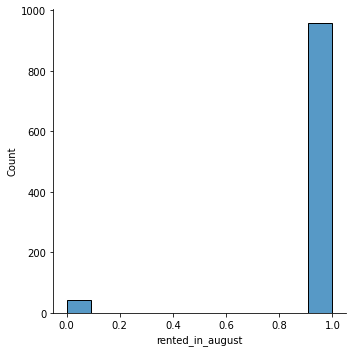

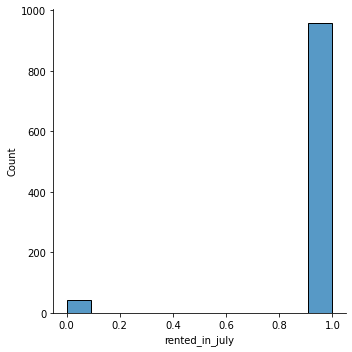

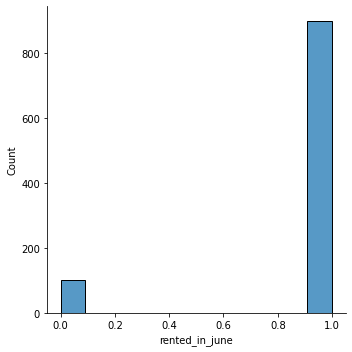

In [179]:
# look at the scale and distribution of values
sns.displot(data['rented_in_august'])
plt.show()

sns.displot(data['rented_in_july'])
plt.show()

sns.displot(data['rented_in_june'])
plt.show()

In [180]:
#Analyze extracted features and transform them.
# Need to train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['rented_in_august']
X = data.drop('rented_in_august', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [181]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [157]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rented_in_july,rented_in_june
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [182]:
#把categorical用dummies转成数字 dummies可以转换成相同格的数据，而onehot保留原始数据
#X_train_categorical = X_train.select_dtypes(include = np.object)
#X_train_cat = pd.get_dummies(X_train_categorical, 
                             #columns=['rented_in_july', 'rented_in_june', 'rented_in_august'],
                             #drop_first=True)
#X_train_cat.head()

In [184]:
#sns.displot(X_train_norm['']) # normalized
#sns.displot(X_train_num[''].apply(lambda x:np.log(x))) # divide by twelve to get a 0-1 scale
#plt.show()

In [195]:
#sns.displot(X_train_norm['']) # normalized
#sns.displot(X_train_num[''].apply(lambda x:np.log(x) if x>0 else x)) # /12? (log transformed)
#plt.show()

In [198]:
# for categoricals
#X_test_categorical = X_test.select_dtypes(include = np.object)
#X_test_cat = pd.get_dummies(X_test_categorical, 
                            #columns=['title'],
                            #drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
#display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each original column seperately with one_hot_encoder

#X_test_cat.head()

In [199]:
#X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)